In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
!pwd

/content


In [3]:
!ls "/content/gdrive/MyDrive/Kaggle2"

test_nolabels.csv  train.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
#from catboost import Pool, CatBoostClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score, f1_score
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
train_df = pd.read_csv("/content/gdrive/MyDrive/Kaggle2/train.csv",index_col=0)
test_df = pd.read_csv('/content/gdrive/MyDrive/Kaggle2/test_nolabels.csv', index_col = 'S.No')

In [6]:
print(train_df.shape)
print(test_df.shape)

(62000, 217)
(1200, 216)


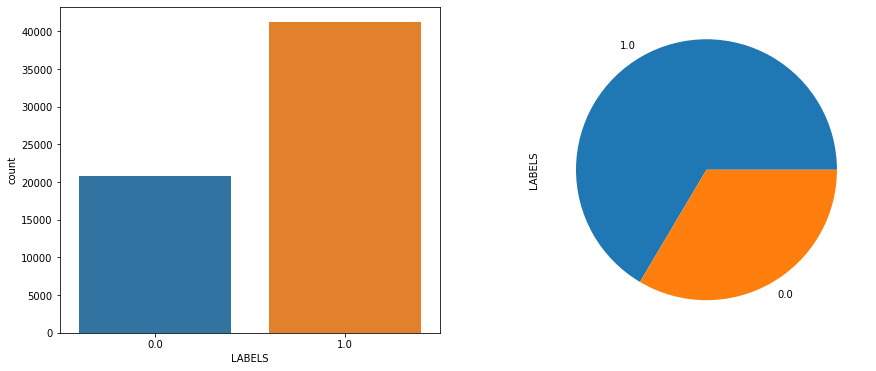

In [7]:
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='LABELS', data=train_df, ax=ax[0])
_ = train_df['LABELS'].value_counts().plot.pie(ax=ax[1])

In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
S2_B2_jan,62000.0,-11.724671,4.241818,-57.171004,-13.857931,-11.442431,-9.245148,14.057914
S2_B3_jan,62000.0,-17.971911,4.724715,-74.840663,-20.492101,-17.516489,-14.824632,7.074079
S2_B4_jan,62000.0,2036.387745,1911.414225,-56.392936,937.234240,1142.971343,1962.460051,13624.663133
S2_B5_jan,62000.0,2055.863785,1910.020462,299.238220,936.750310,1185.170514,2061.126093,14274.620618
S2_B6_jan,62000.0,2249.486666,2064.795406,308.116962,956.722972,1399.391762,2461.075116,15724.538745
...,...,...,...,...,...,...,...,...
ERA5_total_precipitation_dec,62000.0,0.003248,0.003646,0.000091,0.001020,0.001846,0.003916,0.045823
topo_elevation_dec,62000.0,540.429021,610.147342,-119.033169,129.433855,305.315006,792.012585,5376.089584
topo_slope_dec,62000.0,4.970936,6.697951,-0.163469,1.324655,2.572516,5.339283,73.877508
NDVI_dec,62000.0,0.266457,0.199619,-0.643869,0.102681,0.249438,0.417680,0.796425


In [10]:
#checking if there is any null values present
print(train_df.isnull().sum())

S2_B2_jan                       0
S2_B3_jan                       0
S2_B4_jan                       0
S2_B5_jan                       0
S2_B6_jan                       0
                               ..
ERA5_total_precipitation_dec    0
topo_elevation_dec              0
topo_slope_dec                  0
NDVI_dec                        0
LABELS                          0
Length: 217, dtype: int64


In [8]:
#splitting the train dataset
X = train_df.iloc[:, :-1]
Y = train_df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

print(X.shape)
print(Y.shape)

(62000, 216)
(62000,)


In [15]:
#KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
knn_predictions = knn_classifier.predict(x_test)
knn_predictions_train = knn_classifier.predict(x_train)
knn_predictions_test = knn_classifier.predict(test_df)

print("The accuracy of train set is : ", accuracy_score(y_train,knn_predictions_train))
print("\n")
print("The accuracy of test set is : ", accuracy_score(y_test,knn_predictions))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,knn_predictions))

The accuracy of train set is :  0.8487000481463649


The accuracy of test set is :  0.7735092864125123


The classification report is as follows:
               precision    recall  f1-score   support

         0.0       0.66      0.66      0.66      6855
         1.0       0.83      0.83      0.83     13605

    accuracy                           0.77     20460
   macro avg       0.75      0.74      0.75     20460
weighted avg       0.77      0.77      0.77     20460



In [21]:
print("The F1 Score is as follows:\n", f1_score(y_test, knn_predictions, labels=None, pos_label=1, average='weighted'))

The F1 Score is as follows:
 0.7732187008195665


In [18]:
#Logistic Regression using scikit Learn
logreg_classifier = LogisticRegression(random_state=42,solver='liblinear')
logreg_classifier.fit(x_train, y_train)

logreg_predictions = logreg_classifier.predict(x_test)
# logreg_predictions_test = logreg_classifier.predict(test_df)

logreg_predictions_train = logreg_classifier.predict(x_train)

print("The accuracy of train set is : ", accuracy_score(y_train,logreg_predictions_train))
print("\n")
print("The accuracy of test is : ", accuracy_score(y_test,logreg_predictions))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,logreg_predictions))
print("\n")
print("The F1 Score is as follows:\n", f1_score(y_test, logreg_predictions, labels=None, pos_label=1, average='weighted'))


# Saving .csv 
# submission = pd.DataFrame({'S.No': test_df.index,'LABELS':logreg_predictions_test.astype(int)})
# #print(submission.LABELS)


# filename = 'Submission_Abhay_LogReg.csv'

# submission.to_csv(filename,index=False)

# print('Saved file: ' + filename)

The accuracy of train set is :  0.7474482426576794


The accuracy of test is :  0.7417399804496578


The classification report is as follows:
               precision    recall  f1-score   support

         0.0       0.65      0.50      0.56      6855
         1.0       0.77      0.86      0.82     13605

    accuracy                           0.74     20460
   macro avg       0.71      0.68      0.69     20460
weighted avg       0.73      0.74      0.73     20460



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [20]:
print("The F1 Score is as follows:\n", f1_score(y_test, logreg_predictions, labels=None, pos_label=1, average='weighted'))

The F1 Score is as follows:
 0.7319911638993587


In [24]:
# Random Forest with no hyperparameter tuning

rf_classifier = RandomForestClassifier(random_state=42)      
rf_classifier = rf_classifier.fit(x_train,y_train)

rf_predictions = rf_classifier.predict(x_test)
rf_predictions_test = rf_classifier.predict(test_df)

rf_predictions_train = rf_classifier.predict(x_train)

print("The accuracy of train set is : ", accuracy_score(y_train,rf_predictions_train))
print("\n")
print("The accuracy of test is : ", accuracy_score(y_test,rf_predictions))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,rf_predictions))
print("The F1 Score is as follows:\n", f1_score(y_test, rf_predictions, labels=None, pos_label=1, average='weighted'))

The accuracy of train set is :  0.9931150698122292


The accuracy of test is :  0.8421798631476051


The classification report is as follows:
               precision    recall  f1-score   support

         0.0       0.79      0.72      0.75      6855
         1.0       0.86      0.91      0.88     13605

    accuracy                           0.84     20460
   macro avg       0.83      0.81      0.82     20460
weighted avg       0.84      0.84      0.84     20460

The F1 Score is as follows:
 0.8399965385063092


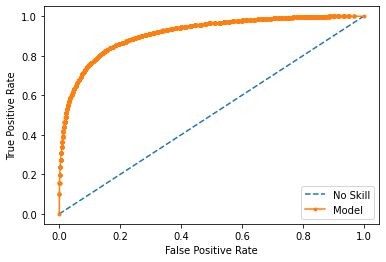

Best Threshold=0.620833, G-Mean=0.837


In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(x_test)[:, 1])
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

In [27]:
#Hyper Parameter tuning of Random Forest using Grid search

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 800, num = 10)]
#print(n_estimators)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2, 4, 8, 12]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 97, 185, 273, 361, 448, 536, 624, 712, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 8, 12], 'min_samples_split': [2, 5, 8], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
# rf_Model = RandomForestClassifier()
# from sklearn.model_selection import RandomizedSearchCV
# rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 5, verbose=2, n_jobs = -1)
# rf_RandomGrid.fit(x_train, y_train)

# rf_RandomGrid.best_params_

In [28]:
param_grid_tuned = {'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 536}

rf_Model = RandomForestClassifier(**param_grid_tuned).fit(x_train, y_train)

rf_predictions = rf_Model.predict(x_test)
rf_predictions_test = rf_Model.predict(test_df)

rf_predictions_train = rf_Model.predict(x_train)

print("The accuracy of train set is : ", accuracy_score(y_train,rf_predictions_train))
print("\n")
print("The accuracy of test is : ", accuracy_score(y_test,rf_predictions))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,rf_predictions))
print("The F1 Score is as follows:\n", f1_score(y_test, rf_predictions, labels=None, pos_label=1, average='weighted'))

The accuracy of train set is :  0.9902503610977371


The accuracy of test is :  0.8470674486803519


The classification report is as follows:
               precision    recall  f1-score   support

         0.0       0.81      0.71      0.76      6855
         1.0       0.86      0.91      0.89     13605

    accuracy                           0.85     20460
   macro avg       0.84      0.81      0.82     20460
weighted avg       0.84      0.85      0.84     20460

The F1 Score is as follows:
 0.8445311738080634


In [29]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.4 MB/s 
     |████████████████████████████████| 209 kB 44.7 MB/s 
     |████████████████████████████████| 80 kB 8.2 MB/s 
     |████████████████████████████████| 75 kB 4.0 MB/s 
     |████████████████████████████████| 49 kB 4.6 MB/s 
     |████████████████████████████████| 149 kB 49.8 MB/s 
     |████████████████████████████████| 112 kB 51.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=eb1e26eaa15a3b4c0cfe4a5e7e040d86fbd004f6564b6edd5895c17ed45a3f11
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [48]:
import optuna
from sklearn.model_selection import cross_val_score 
def objective(trial):
    bootstrap = trial.suggest_categorical('bootstrap',['True','False'])
    max_depth = int(trial.suggest_discrete_uniform('max_depth', 10, 1000,10))
    max_leaf_nodes = int(trial.suggest_discrete_uniform('max_leaf_nodes', 10, 1000,10))
    n_estimators =  int(trial.suggest_discrete_uniform('n_estimators', 10, 1000,10))
    min_samples_split = trial.suggest_int("min_samples_split", 2, 5)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)
 
    
    clf = RandomForestClassifier(bootstrap = bootstrap,
                                 max_depth = max_depth,
                                 max_leaf_nodes = max_leaf_nodes,
                                 n_estimators = n_estimators,
                                 n_jobs=-1,
                                 min_samples_leaf=min_samples_leaf,
                                 min_samples_split=min_samples_split)
 
    score = cross_val_score(clf, X, Y, cv=5, scoring="f1")
 
    return score.mean()
#Learn with optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

trial = study.best_trial

print('Precision: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

In [49]:
#Reference - https://www.kaggle.com/corochann/optuna-tutorial-for-hyperparameter-optimization

#Optimization history
#It is a best score's history, blue dot is the score of this trial and orange line show the best score.
#Note that blue dot is not in the all trial, because we turned on pruning thus many of the trials are stopped before getting final objective value.

# optuna.visualization.plot_optimization_history(study)
# optuna.visualization.plot_parallel_coordinate(study)

In [34]:
from sklearn.ensemble import ExtraTreesClassifier   

et_clf = ExtraTreesClassifier()
et_clf.fit(x_train, y_train)
#et_clf.fit(X, Y)
y_pred_et = et_clf.predict(x_test)
# y_pred_test = xgb_clf.predict(test_df)
x_pred = et_clf.predict(x_train)

print("The accuracy of train set is : ", accuracy_score(y_train,x_pred))
print("\n")
print("The accuracy of test is : ", accuracy_score(y_test,y_pred_et))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,y_pred_et))
print("The F1 Score is as follows:\n", f1_score(y_test, y_pred_et, labels=None, pos_label=1, average='weighted'))

The accuracy of train set is :  0.9931150698122292


The accuracy of test is :  0.8403714565004887


The classification report is as follows:
               precision    recall  f1-score   support

         0.0       0.80      0.70      0.75      6855
         1.0       0.86      0.91      0.88     13605

    accuracy                           0.84     20460
   macro avg       0.83      0.81      0.82     20460
weighted avg       0.84      0.84      0.84     20460

The F1 Score is as follows:
 0.8376747441082503


In [35]:
#Attempt 2 
from sklearn.model_selection import cross_validate
import optuna 

def objective(trial):

        random_state = 42
        n_jobs = -1
        max_depth = trial.suggest_int("max_depth", 80, 120)
        n_estimators = trial.suggest_int("n_estimators", 80, 120)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 9)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)
    

        classifier_obj = ExtraTreesClassifier( random_state      = random_state,
                                                  n_jobs            = n_jobs,
                                                  max_depth         = max_depth,
                                                  n_estimators      = n_estimators,
                                                  min_samples_split = min_samples_split,
                                                  min_samples_leaf  = min_samples_leaf
                                                  ) 

  
        result = cross_validate(classifier_obj, X, y=Y, cv=5, scoring='f1')
    
        return result['test_score'].mean()


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 100)

trial = study.best_trial

print('Precision: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-12-17 02:19:34,391] A new study created in memory with name: no-name-f7b118a1-2bbc-45cb-adc6-41ecd7e1b4e3
[I 2021-12-17 02:20:29,061] Trial 0 finished with value: 0.8809450288726269 and parameters: {'max_depth': 119, 'n_estimators': 82, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8809450288726269.
[I 2021-12-17 02:21:47,233] Trial 1 finished with value: 0.8829269776573339 and parameters: {'max_depth': 107, 'n_estimators': 116, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.8829269776573339.
[I 2021-12-17 02:23:10,737] Trial 2 finished with value: 0.8834686074449041 and parameters: {'max_depth': 81, 'n_estimators': 112, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.8834686074449041.
[I 2021-12-17 02:24:20,111] Trial 3 finished with value: 0.8832915098995902 and parameters: {'max_depth': 87, 'n_estimators': 103, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 2 with valu

Precision: 0.8842078906330556
Best hyperparameters: {'max_depth': 102, 'n_estimators': 108, 'min_samples_split': 6, 'min_samples_leaf': 1}


In [36]:
optuna.visualization.plot_optimization_history(study)

In [37]:
optuna.visualization.plot_parallel_coordinate(study)

In [39]:
study.best_params

{'max_depth': 102,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 108}

In [40]:
params = {'max_depth': 102,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 108}


from sklearn.ensemble import ExtraTreesClassifier   

et_clf = ExtraTreesClassifier(**params)
et_clf.fit(x_train, y_train)
#et_clf.fit(X, Y)
y_pred_et = et_clf.predict(x_test)
# y_pred_test = xgb_clf.predict(test_df)
x_pred = et_clf.predict(x_train)

print("The accuracy of train set is : ", accuracy_score(y_train,x_pred))
print("\n")
print("The accuracy of test is : ", accuracy_score(y_test,y_pred_et))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,y_pred_et))
print("The F1 Score is as follows:\n", f1_score(y_test, y_pred_et, labels=None, pos_label=1, average='weighted'))

The accuracy of train set is :  0.9931150698122292


The accuracy of test is :  0.838514173998045


The classification report is as follows:
               precision    recall  f1-score   support

         0.0       0.80      0.69      0.74      6855
         1.0       0.85      0.92      0.88     13605

    accuracy                           0.84     20460
   macro avg       0.83      0.80      0.81     20460
weighted avg       0.84      0.84      0.84     20460

The F1 Score is as follows:
 0.8350154892359416


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



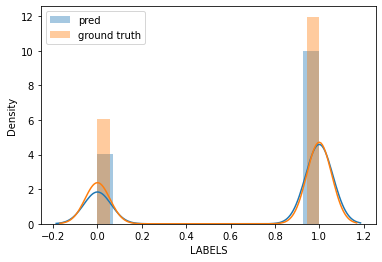

In [41]:
sns.distplot(y_pred_et, label='pred')
sns.distplot(y_train, label='ground truth')
plt.legend()
plt.show()

In [46]:
optuna.visualization.plot_param_importances(study)

In [55]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [56]:
# Catboost 
from catboost import CatBoostClassifier
def lgb_f1_score(y_true, y_hat):
    y_true = data.get_label()
    y_hat = np.round(y_hat) 
    return 'f1', f1_score(y_true, y_hat), True
model = CatBoostClassifier(eval_metric= 'F1')
kf = KFold(n_splits=5, random_state=42, shuffle=True)

y_valid_pred = 0 * Y
y_test_pred = 0

for idx, (train_index, valid_index) in enumerate(kf.split(X,Y)):
    y_train, y_valid = Y.iloc[train_index], Y.iloc[valid_index]
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    # _train = Pool(X_train, label=y_train)
    # _valid = Pool(X_valid, label=y_valid)
    print( "\nFold ", idx)
    fit_model = model.fit(X_train, y_train,
                          eval_set=[(X_train, y_train) , (X_valid, y_valid)],
                          use_best_model=True,
                          verbose=200
                         )
    pred = fit_model.predict(X_valid)
    print( "  classification report = ", classification_report(y_valid, pred) )
    y_valid_pred.iloc[valid_index] = pred
    y_test_pred += fit_model.predict_proba(test_df)[:,1]
y_test_pred /= 5

# submission = pd.DataFrame({'S.No': test_df.index,'LABELS':y_test_pred.astype(int)})
# #print(submission.LABELS)


# filename = 'Submission_Catboost_Kfold.csv'

# submission.to_csv(filename,index=False)

# print('Saved file: ' + filename)




Fold  0
Learning rate set to 0.083118
0:	learn: 0.8163428	test: 0.8163428	test1: 0.8183061	best: 0.8183061 (0)	total: 159ms	remaining: 2m 39s
200:	learn: 0.8911163	test: 0.8911163	test1: 0.8787525	best: 0.8789861 (198)	total: 20.8s	remaining: 1m 22s
400:	learn: 0.9148170	test: 0.9148170	test1: 0.8839070	best: 0.8841808 (374)	total: 41.1s	remaining: 1m 1s
600:	learn: 0.9317262	test: 0.9317262	test1: 0.8858766	best: 0.8867490 (510)	total: 1m 1s	remaining: 40.8s
800:	learn: 0.9458671	test: 0.9458671	test1: 0.8852595	best: 0.8868607 (674)	total: 1m 21s	remaining: 20.3s
999:	learn: 0.9560222	test: 0.9560222	test1: 0.8869617	best: 0.8869617 (999)	total: 1m 41s	remaining: 0us

bestTest = 0.886961687
bestIteration = 999

  classification report =                precision    recall  f1-score   support

         0.0       0.78      0.74      0.76      4097
         1.0       0.88      0.90      0.89      8303

    accuracy                           0.85     12400
   macro avg       0.83      0.

In [ ]:
#xgboost
from xgboost import XGBClassifier
params = {
            'objective':'binary:logistic',
            'max_depth': 50,
            'alpha': 10,
            'learning_rate': 0.1,
            'n_estimators':1000,
            'scale_pos_weight':1}    

xgb_clf = XGBClassifier(**params)
xgb_clf.fit(x_train, y_train)
y_pred = xgb_clf.predict(x_test)
# y_pred_test = xgb_clf.predict(test_df)
x_pred = xgb_clf.predict(x_train)


print("The accuracy of train set is : ", accuracy_score(y_train,x_pred))
print("\n")

print("The accuracy of test is : ", accuracy_score(y_test,y_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,y_pred))

In [ ]:
# y_pred_test = xgb_clf.predict(test_df)
# submission = pd.DataFrame({'S.No': test_df.index,'LABELS':y_pred_test.astype(int)})
# #print(submission.LABELS)


# filename = 'Submission_Akelius_XGboost_tuned.csv'

# submission.to_csv(filename,index=False)

# print('Saved file: ' + filename)

In [25]:
import lightgbm as lgb
from sklearn.model_selection import cross_validate
# !pip install optuna
import optuna

def objective(trial):

  #dtrain = lgb.Dataset(x_train, label=y_train)

  param = {
      "objective": "binary",
      "metric": "binary_logloss",
      "verbosity": -1,
      "boosting_type": "gbdt",
      "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
      "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
      "num_leaves": trial.suggest_int("num_leaves", 2, 256),
      "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
      "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
      "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
      "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
  }
    

  classifier_obj = lgb.LGBMClassifier(**param)
  result = cross_validate(classifier_obj, X, y=Y, cv=2, scoring='f1')

  return result['test_score'].mean()


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 100)

trial = study.best_trial

print('Precision: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

In [16]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 35
Best trial:
  Value: 0.8846740004585562
  Params: 
    lambda_l1: 2.9866150968921e-07
    lambda_l2: 1.3247860325668782e-05
    num_leaves: 214
    feature_fraction: 0.5770140141092436
    bagging_fraction: 0.9987747698547473
    bagging_freq: 6
    min_child_samples: 68


In [17]:
study.best_params

{'bagging_fraction': 0.9987747698547473,
 'bagging_freq': 6,
 'feature_fraction': 0.5770140141092436,
 'lambda_l1': 2.9866150968921e-07,
 'lambda_l2': 1.3247860325668782e-05,
 'min_child_samples': 68,
 'num_leaves': 214}

In [19]:
params = {'bagging_fraction': 0.9987747698547473,
 'bagging_freq': 6,
 'feature_fraction': 0.5770140141092436,
 'lambda_l1': 2.9866150968921e-07,
 'lambda_l2': 1.3247860325668782e-05,
 'min_child_samples': 68,
 'num_leaves': 214}

clf = lgb.LGBMClassifier(**params )
clf.fit(x_train, y_train)

y_pred_lgbm = clf.predict(x_test)
# y_pred_test = xgb_clf.predict(test_df)
x_pred = clf.predict(x_train)

print("The accuracy of train set is : ", accuracy_score(y_train,x_pred))
print("\n")
print("The accuracy of test is : ", accuracy_score(y_test,y_pred_lgbm))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,y_pred_lgbm))
print("The F1 Score is as follows:\n", f1_score(y_test, y_pred_lgbm, labels=None, pos_label=1, average='weighted'))

The accuracy of train set is :  0.9901299951853635


The accuracy of test is :  0.8480938416422288


The classification report is as follows:
               precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      6855
         1.0       0.87      0.91      0.89     13605

    accuracy                           0.85     20460
   macro avg       0.83      0.82      0.83     20460
weighted avg       0.85      0.85      0.85     20460

The F1 Score is as follows:
 0.8464509564221742


In [20]:
# #For saving the file
# submission = pd.DataFrame({'S.No': test_df.index,'LABELS':y_pred_test.astype(int)})
# #print(submission.LABELS)


# filename = 'Submission_LGBM_Optuna.csv'

# submission.to_csv(filename,index=False)

# print('Saved file: ' + filename)

In [21]:
#LGBM without Hyperparameter tuning

import lightgbm as lgb
lgbm_tuned = lgb.LGBMClassifier(
                            learning_rate=0.01, 
                            max_depth=25, 
                            n_estimators=1000, 
                            colsample_bytree=0.6) # LightGBM Classifier with optimum paramteres
lgbm_tuned.fit(x_train, y_train) #Fit the model with the optimum parameters

LGBMClassifier(colsample_bytree=0.6, learning_rate=0.01, max_depth=25,
               n_estimators=1000)

In [22]:
y_test_pred = lgbm_tuned.predict(x_test) #Predicting X_test to find the solutiın
# y_test_pred1= lgbm_tuned.predict(test_df)
x_train_pred = lgbm_tuned.predict(x_train)
score = round(accuracy_score(y_test, y_test_pred), 3) # Find the accuracy of y_test and predicitons, and round the result
print(score)

print("The accuracy of train set is : ", accuracy_score(y_train,x_train_pred))
print("\n")
print("The accuracy of test is : ", accuracy_score(y_test,y_test_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_test,y_test_pred))

0.838
The accuracy of train set is :  0.8784545016851227


The accuracy of test is :  0.8383675464320626


The classification report is as follows:
               precision    recall  f1-score   support

         0.0       0.79      0.70      0.74      6855
         1.0       0.86      0.91      0.88     13605

    accuracy                           0.84     20460
   macro avg       0.82      0.81      0.81     20460
weighted avg       0.84      0.84      0.84     20460



In [26]:
kaggle_data = test_df.to_numpy()
pred = lgbm_tuned.predict(kaggle_data)
print(pred[pred==0].size / pred.size, pred[pred==1].size / pred.size)
indices = np.array(list(i for i in range(pred.size)))
result = np.empty((pred.size, 2))
result[:, 0] = indices
result[:, 1] = pred

0.4091666666666667 0.5908333333333333


In [ ]:
# np.savetxt('result_lgbm.csv', result, fmt="%d", delimiter=",")
# !curl --upload-file ./result_lgbm.csv https://transfer.sh/result_lgbm.csv

https://transfer.sh/mXT8Dh/result_lgbm.csv

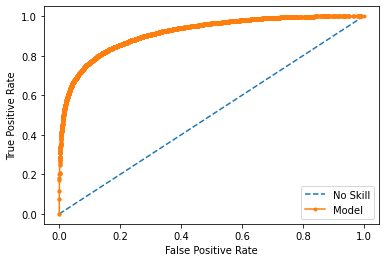

Best Threshold=0.667381, G-Mean=0.836


In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, lgbm_tuned.predict_proba(x_test)[:, 1])
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))